In [1]:
import json
import os
from docx import Document
import pandas as pd
import numpy as np

In [2]:
TrainFolder = 'Train'
TrainFiles = [os.path.join(TrainFolder,file) for file in os.listdir(TrainFolder) if file.endswith('.docx')]
TrainFiles

['Train\\1.docx',
 'Train\\10.docx',
 'Train\\11.docx',
 'Train\\12.docx',
 'Train\\13.docx',
 'Train\\14.docx',
 'Train\\15.docx',
 'Train\\16.docx',
 'Train\\17.docx',
 'Train\\18.docx',
 'Train\\19.docx',
 'Train\\2.docx',
 'Train\\20.docx',
 'Train\\21.docx',
 'Train\\22.docx',
 'Train\\23.docx',
 'Train\\24.docx',
 'Train\\25.docx',
 'Train\\26.docx',
 'Train\\27.docx',
 'Train\\28.docx',
 'Train\\29.docx',
 'Train\\3.docx',
 'Train\\30.docx',
 'Train\\31.docx',
 'Train\\32.docx',
 'Train\\33.docx',
 'Train\\34.docx',
 'Train\\35.docx',
 'Train\\36.docx',
 'Train\\37.docx',
 'Train\\39.docx',
 'Train\\4.docx',
 'Train\\40.docx',
 'Train\\41.docx',
 'Train\\42.docx',
 'Train\\43.docx',
 'Train\\44.docx',
 'Train\\45.docx',
 'Train\\46.docx',
 'Train\\47.docx',
 'Train\\48.docx',
 'Train\\49.docx',
 'Train\\5.docx',
 'Train\\50.docx',
 'Train\\51.docx',
 'Train\\52.docx',
 'Train\\53.docx',
 'Train\\54.docx',
 'Train\\55.docx',
 'Train\\56.docx',
 'Train\\57.docx',
 'Train\\58.docx'

In [3]:
def extract_text_from_docx(file_path):
    document = Document(file_path)
    text = []
    for paragraph in document.paragraphs:
        text.append(paragraph.text)
    return "\n".join(text)

def flatten_json_data(json_data):
    flattened_data = []
    for entry in json_data:
        record = {
            "type": entry.get("type"),
            "status": entry.get("status"),
            "departure_iata": entry["departure"].get("iataCode"),
            "departure_icao": entry["departure"].get("icaoCode"),
            "departure_scheduled": entry["departure"].get("scheduledTime"),
            "departure_actual": entry["departure"].get("actualTime"),
            "arrival_iata": entry["arrival"].get("iataCode"),
            "arrival_icao": entry["arrival"].get("icaoCode"),
            "airline_name": entry["airline"].get("name"),
            "airline_iata": entry["airline"].get("iataCode"),
            "flight_number": entry["flight"].get("number"),
        }

        if "codeshared" in entry:
            record["codeshared_airline"] = entry["codeshared"]["airline"].get("name")
            record["codeshared_flight"] = entry["codeshared"]["flight"].get("number")

        flattened_data.append(record)
    return flattened_data



In [4]:
all_flattened_data = []

for docx_file in TrainFiles:
    print(f"Processing file: {docx_file}")
    try:
        file_content = extract_text_from_docx(docx_file)
        json_data = json.loads(file_content)
        flattened_data = flatten_json_data(json_data)
        all_flattened_data.extend(flattened_data)

    except Exception as e:
        print(f"Error processing file {docx_file}: {e}")

df = pd.DataFrame(all_flattened_data)

output_file = "processed_train_data.csv"
df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")
print(df.head())

Processing file: Train\1.docx
Processing file: Train\10.docx
Processing file: Train\11.docx
Processing file: Train\12.docx
Processing file: Train\13.docx
Processing file: Train\14.docx
Processing file: Train\15.docx
Processing file: Train\16.docx
Processing file: Train\17.docx
Processing file: Train\18.docx
Processing file: Train\19.docx
Processing file: Train\2.docx
Processing file: Train\20.docx
Processing file: Train\21.docx
Processing file: Train\22.docx
Processing file: Train\23.docx
Processing file: Train\24.docx
Processing file: Train\25.docx
Processing file: Train\26.docx
Processing file: Train\27.docx
Processing file: Train\28.docx
Processing file: Train\29.docx
Processing file: Train\3.docx
Processing file: Train\30.docx
Processing file: Train\31.docx
Processing file: Train\32.docx
Processing file: Train\33.docx
Processing file: Train\34.docx
Processing file: Train\35.docx
Processing file: Train\36.docx
Processing file: Train\37.docx
Processing file: Train\39.docx
Processing 

In [5]:
df

,type,status,departure_iata,departure_icao,departure_scheduled,departure_actual,arrival_iata,arrival_icao,airline_name,airline_iata,flight_number,codeshared_airline,codeshared_flight
0,departure,active,lhe,opla,2023-07-20t20:50:00.000,2023-07-20t20:15:00.000,ruh,oerk,saudia,sv,737,NaN,NaN
1,departure,active,lhe,opla,2023-07-18t15:05:00.000,None,khi,opkc,flyjinnah,9p,843,NaN,NaN
2,departure,active,lhe,opla,2023-07-23t09:50:00.000,None,khi,opkc,flyjinnah,9p,841,NaN,NaN
3,departure,active,lhe,opla,2023-07-26t23:30:00.000,2023-07-26t23:51:00.000,kwi,okkk,pakistan international airlines,pk,205,NaN,NaN
4,departure,active,lhe,opla,2023-07-20t11:35:00.000,None,dxb,omdb,serene air,er,723,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,lhe,opla,2023-11-16t09:50:00.000,2023-11-16t10:03:00.000,khi,opkc,flyjinnah,9p,841,NaN,NaN
51568,departure,active,lhe,opla,2023-11-16t11:40:00.000,2023-11-16t11:48:00.000,jed,oejn,saudia,sv,735,NaN,NaN
51569,departure,active,lhe,opla,2023-11-27t10:50:00.000,None,dxb,omdb,pakistan international airlines,pk,203,NaN,NaN
51570,departure,active,lhe,opla,2023-11-19t02:00:00.000,None,kul,wmkk,pakistan international airlines,pk,898,NaN,NaN


In [6]:
df['departure_actual'] = df['departure_actual'].fillna(df['departure_scheduled'])  # Replace with scheduled time if actual is missing
df['codeshared_airline'] = df['codeshared_airline'].fillna("No Code Share")
df['codeshared_flight'] = df['codeshared_flight'].fillna("No Code Share")

df['departure_scheduled'] = pd.to_datetime(df['departure_scheduled'], errors='coerce')
df['departure_actual'] = pd.to_datetime(df['departure_actual'], errors='coerce')

In [7]:
df['departure_delay'] = (df['departure_actual'] - df['departure_scheduled']).dt.total_seconds() / 60
print("Updated DataFrame with Departure Delay:")
print(df[['departure_scheduled', 'departure_actual', 'departure_delay']].head())


Updated DataFrame with Departure Delay:
  departure_scheduled    departure_actual  departure_delay
0 2023-07-20 20:50:00 2023-07-20 20:15:00            -35.0
1 2023-07-18 15:05:00 2023-07-18 15:05:00              0.0
2 2023-07-23 09:50:00 2023-07-23 09:50:00              0.0
3 2023-07-26 23:30:00 2023-07-26 23:51:00             21.0
4 2023-07-20 11:35:00 2023-07-20 11:35:00              0.0


In [8]:

df['departure_scheduled'] = pd.to_datetime(df['departure_scheduled'])

df['Year'] = df['departure_scheduled'].dt.year
df['Month'] = df['departure_scheduled'].dt.strftime('%b')  
df['Day'] = df['departure_scheduled'].dt.day.astype(str)
df['Hour'] = df['departure_scheduled'].dt.hour

In [9]:
total_nan = df.isnull().sum().sum()
print(f"Total NaN values in the DataFrame: {total_nan}")

Total NaN values in the DataFrame: 0


In [10]:
df

,type,status,departure_iata,departure_icao,departure_scheduled,departure_actual,arrival_iata,arrival_icao,airline_name,airline_iata,flight_number,codeshared_airline,codeshared_flight,departure_delay,Year,Month,Day,Hour
0,departure,active,lhe,opla,2023-07-20 20:50:00,2023-07-20 20:15:00,ruh,oerk,saudia,sv,737,No Code Share,No Code Share,-35.0,2023,Jul,20,20
1,departure,active,lhe,opla,2023-07-18 15:05:00,2023-07-18 15:05:00,khi,opkc,flyjinnah,9p,843,No Code Share,No Code Share,0.0,2023,Jul,18,15
2,departure,active,lhe,opla,2023-07-23 09:50:00,2023-07-23 09:50:00,khi,opkc,flyjinnah,9p,841,No Code Share,No Code Share,0.0,2023,Jul,23,9
3,departure,active,lhe,opla,2023-07-26 23:30:00,2023-07-26 23:51:00,kwi,okkk,pakistan international airlines,pk,205,No Code Share,No Code Share,21.0,2023,Jul,26,23
4,departure,active,lhe,opla,2023-07-20 11:35:00,2023-07-20 11:35:00,dxb,omdb,serene air,er,723,No Code Share,No Code Share,0.0,2023,Jul,20,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,lhe,opla,2023-11-16 09:50:00,2023-11-16 10:03:00,khi,opkc,flyjinnah,9p,841,No Code Share,No Code Share,13.0,2023,Nov,16,9
51568,departure,active,lhe,opla,2023-11-16 11:40:00,2023-11-16 11:48:00,jed,oejn,saudia,sv,735,No Code Share,No Code Share,8.0,2023,Nov,16,11
51569,departure,active,lhe,opla,2023-11-27 10:50:00,2023-11-27 10:50:00,dxb,omdb,pakistan international airlines,pk,203,No Code Share,No Code Share,0.0,2023,Nov,27,10
51570,departure,active,lhe,opla,2023-11-19 02:00:00,2023-11-19 02:00:00,kul,wmkk,pakistan international airlines,pk,898,No Code Share,No Code Share,0.0,2023,Nov,19,2


In [11]:
WeatherFolder = 'Weather'
WeatherFiles = [os.path.join(WeatherFolder,file) for file in os.listdir(WeatherFolder) if file.endswith('.xlsx')]
selected_files = [file for file in WeatherFiles if any(file.endswith(f"\\{i}.xlsx") for i in range(1, 14))]

selected_files = sorted(
    selected_files, 
    key=lambda x: int(os.path.splitext(os.path.basename(x))[0])
)
selected_files

['Weather\\1.xlsx',
 'Weather\\2.xlsx',
 'Weather\\3.xlsx',
 'Weather\\4.xlsx',
 'Weather\\5.xlsx',
 'Weather\\6.xlsx',
 'Weather\\7.xlsx',
 'Weather\\8.xlsx',
 'Weather\\9.xlsx',
 'Weather\\10.xlsx',
 'Weather\\11.xlsx',
 'Weather\\12.xlsx',
 'Weather\\13.xlsx']

In [12]:
import pandas as pd

columns = ['Year','Month', 'Day', 'Max Temp', 'Avg Temp', 'Min Temp', 'Max Dew Point', 'Avg Dew Point', 'Min Dew Point', 'Max Humidity', 'Avg Humidity', 'Min Humidity', 'Max Wind Speed', 'Avg Wind Speed', 'Min Wind Speed', 'Precipitation']

df_weather = pd.DataFrame(columns=columns)
current_year = 2023

for file in selected_files:
  
    df_weather_raw = pd.read_excel(file, header=None) 
    features = df_weather_raw.iloc[0, 1:].values 
    raw_data = df_weather_raw.iloc[1:, :].values
    months_and_days = raw_data[0, 0].split()  
    month = months_and_days[0]
    days = months_and_days[1:]

    for i, day in enumerate(days):
        new_row = [current_year,month, day]  

        temperature = raw_data[0, 1].split() 
        new_row.append(temperature[3 + (i * 3)])  
        new_row.append(temperature[3 + (i * 3) + 1])  
        new_row.append(temperature[3 + (i * 3) + 2]) 

        dew_point = raw_data[0, 2].split()  
        new_row.append(dew_point[3 + (i * 3)]) 
        new_row.append(dew_point[3 + (i * 3) + 1])  
        new_row.append(dew_point[3 + (i * 3) + 2]) 

        humidity = raw_data[0, 3].split() 
        new_row.append(humidity[3 + (i * 3)]) 
        new_row.append(humidity[3 + (i * 3) + 1])  
        new_row.append(humidity[3 + (i * 3) + 2])  

        wind_speed = raw_data[0, 4].split()  
        new_row.append(wind_speed[3 + (i * 3)])  
        new_row.append(wind_speed[3 + (i * 3) + 1])  
        new_row.append(wind_speed[3 + (i * 3) + 2])  

        precipitation = raw_data[0, 5].split()  
        new_row.append(precipitation[3 + i]) 

        # Append the row to the DataFrame
        df_weather.loc[len(df_weather)] = new_row
        

    if(month=='Dec'):
        current_year+=1

df_weather


,Year,Month,Day,Max Temp,Avg Temp,Min Temp,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Precipitation
0,2023,Jul,1,97,88.8,81,77,74.5,72,74,63.4,47,14,8.9,5,28.8
1,2023,Jul,2,99,91.5,82,79,75.8,75,79,61.3,47,12,6.7,0,28.8
2,2023,Jul,3,102,91.7,77,81,77.0,73,100,63.7,45,35,11.0,0,28.7
3,2023,Jul,4,97,88.5,81,77,74.3,73,79,64.0,47,32,13.0,0,28.8
4,2023,Jul,5,86,76.0,68,79,72.9,68,100,90.2,70,40,15.0,5,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2024,Jul,10,100,88.2,81,84,76.7,73,94,69.8,50,40,8.6,3,28.8
376,2024,Jul,11,100,90.7,81,81,76.8,73,89,65.7,44,12,6.7,3,28.8
377,2024,Jul,12,90,79.4,72,82,74.9,72,100,85.5,70,35,14.0,3,28.7
378,2024,Jul,13,97,85.5,75,73,71.7,70,94,65.2,41,12,5.4,0,28.8


In [13]:
df_weather.to_csv("weather.csv", index=False)

In [14]:
total_nan = df_weather.isnull().sum().sum()
print(f"Total NaN values in the DataFrame: {total_nan}")

Total NaN values in the DataFrame: 0


In [15]:
df_merged = pd.merge(df, df_weather, on=['Year','Month', 'Day'], how='left')

df_merged

,type,status,departure_iata,departure_icao,departure_scheduled,departure_actual,arrival_iata,arrival_icao,airline_name,airline_iata,...,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Precipitation
0,departure,active,lhe,opla,2023-07-20 20:50:00,2023-07-20 20:15:00,ruh,oerk,saudia,sv,...,81,79.8,77,89,76.0,63,12,5.3,0,28.9
1,departure,active,lhe,opla,2023-07-18 15:05:00,2023-07-18 15:05:00,khi,opkc,flyjinnah,9p,...,81,80.1,77,84,73.8,63,17,10.2,0,28.8
2,departure,active,lhe,opla,2023-07-23 09:50:00,2023-07-23 09:50:00,khi,opkc,flyjinnah,9p,...,79,75.8,73,83,71.2,56,14,8.1,0,27.1
3,departure,active,lhe,opla,2023-07-26 23:30:00,2023-07-26 23:51:00,kwi,okkk,pakistan international airlines,pk,...,82,78.9,75,100,77.4,59,17,8.1,0,28.8
4,departure,active,lhe,opla,2023-07-20 11:35:00,2023-07-20 11:35:00,dxb,omdb,serene air,er,...,81,79.8,77,89,76.0,63,12,5.3,0,28.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,lhe,opla,2023-11-16 09:50:00,2023-11-16 10:03:00,khi,opkc,flyjinnah,9p,...,57,54.8,52,82,65.5,42,7,0.8,0,29.3
51568,departure,active,lhe,opla,2023-11-16 11:40:00,2023-11-16 11:48:00,jed,oejn,saudia,sv,...,57,54.8,52,82,65.5,42,7,0.8,0,29.3
51569,departure,active,lhe,opla,2023-11-27 10:50:00,2023-11-27 10:50:00,dxb,omdb,pakistan international airlines,pk,...,55,54.3,52,88,74.4,60,12,2.3,0,29.2
51570,departure,active,lhe,opla,2023-11-19 02:00:00,2023-11-19 02:00:00,kul,wmkk,pakistan international airlines,pk,...,59,55.0,52,88,66.3,42,8,1.5,0,29.3


In [16]:
total_nan = df_merged.isnull().sum()
print(f"Total NaN values in the DataFrame: {total_nan}")

Total NaN values in the DataFrame: type                   0
status                 0
departure_iata         0
departure_icao         0
departure_scheduled    0
departure_actual       0
arrival_iata           0
arrival_icao           0
airline_name           0
airline_iata           0
flight_number          0
codeshared_airline     0
codeshared_flight      0
departure_delay        0
Year                   0
Month                  0
Day                    0
Hour                   0
Max Temp               0
Avg Temp               0
Min Temp               0
Max Dew Point          0
Avg Dew Point          0
Min Dew Point          0
Max Humidity           0
Avg Humidity           0
Min Humidity           0
Max Wind Speed         0
Avg Wind Speed         0
Min Wind Speed         0
Precipitation          0
dtype: int64


In [17]:
df_merged.to_csv("train.csv", index=False)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

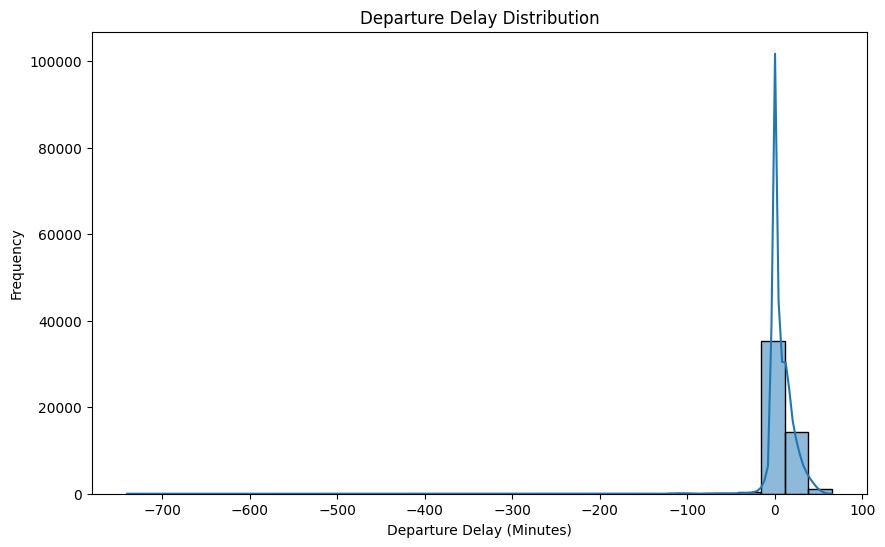

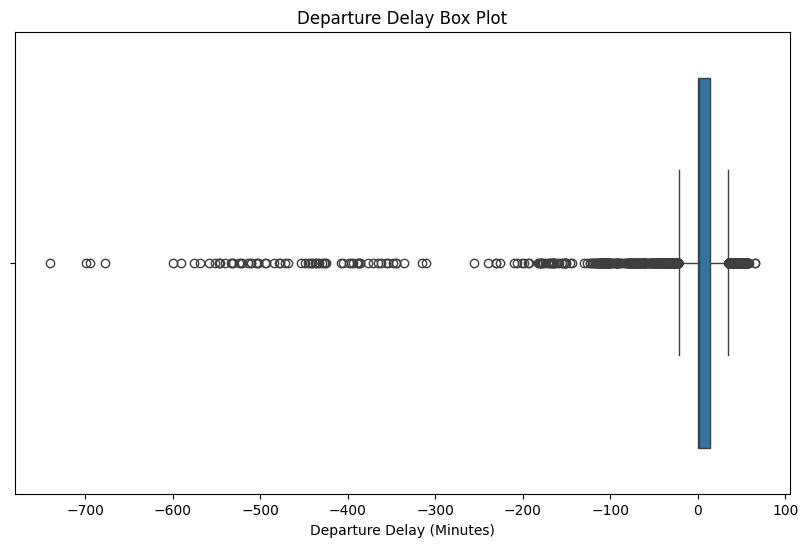

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for delay distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['departure_delay'], kde=True, bins=30)
plt.title('Departure Delay Distribution')
plt.xlabel('Departure Delay (Minutes)')
plt.ylabel('Frequency')
plt.show()

# Box plot to visualize outliers in delays
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['departure_delay'])
plt.title('Departure Delay Box Plot')
plt.xlabel('Departure Delay (Minutes)')
plt.show()


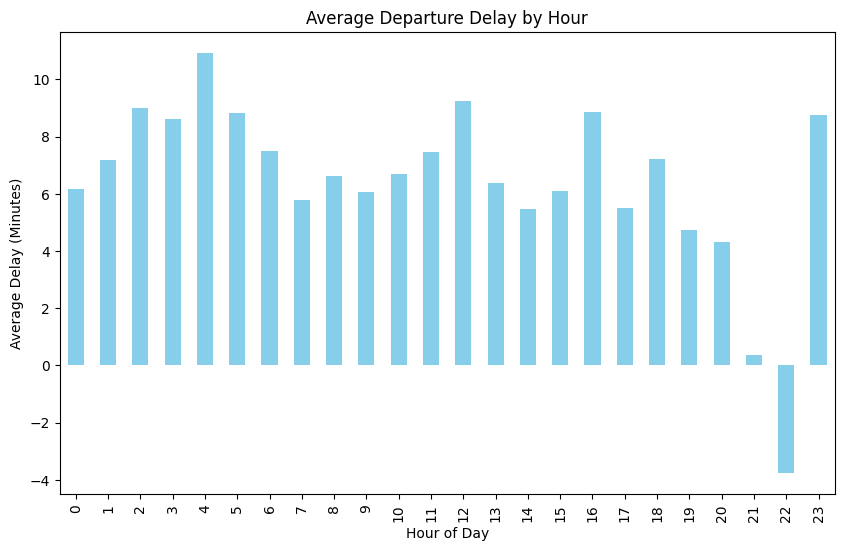

In [20]:
# Temporal analysis by Hour (average delay per hour)
df['departure_hour'] = pd.to_datetime(df['departure_scheduled']).dt.hour
avg_delay_per_hour = df.groupby('departure_hour')['departure_delay'].mean()

plt.figure(figsize=(10, 6))
avg_delay_per_hour.plot(kind='bar', color='skyblue')
plt.title('Average Departure Delay by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (Minutes)')
plt.show()


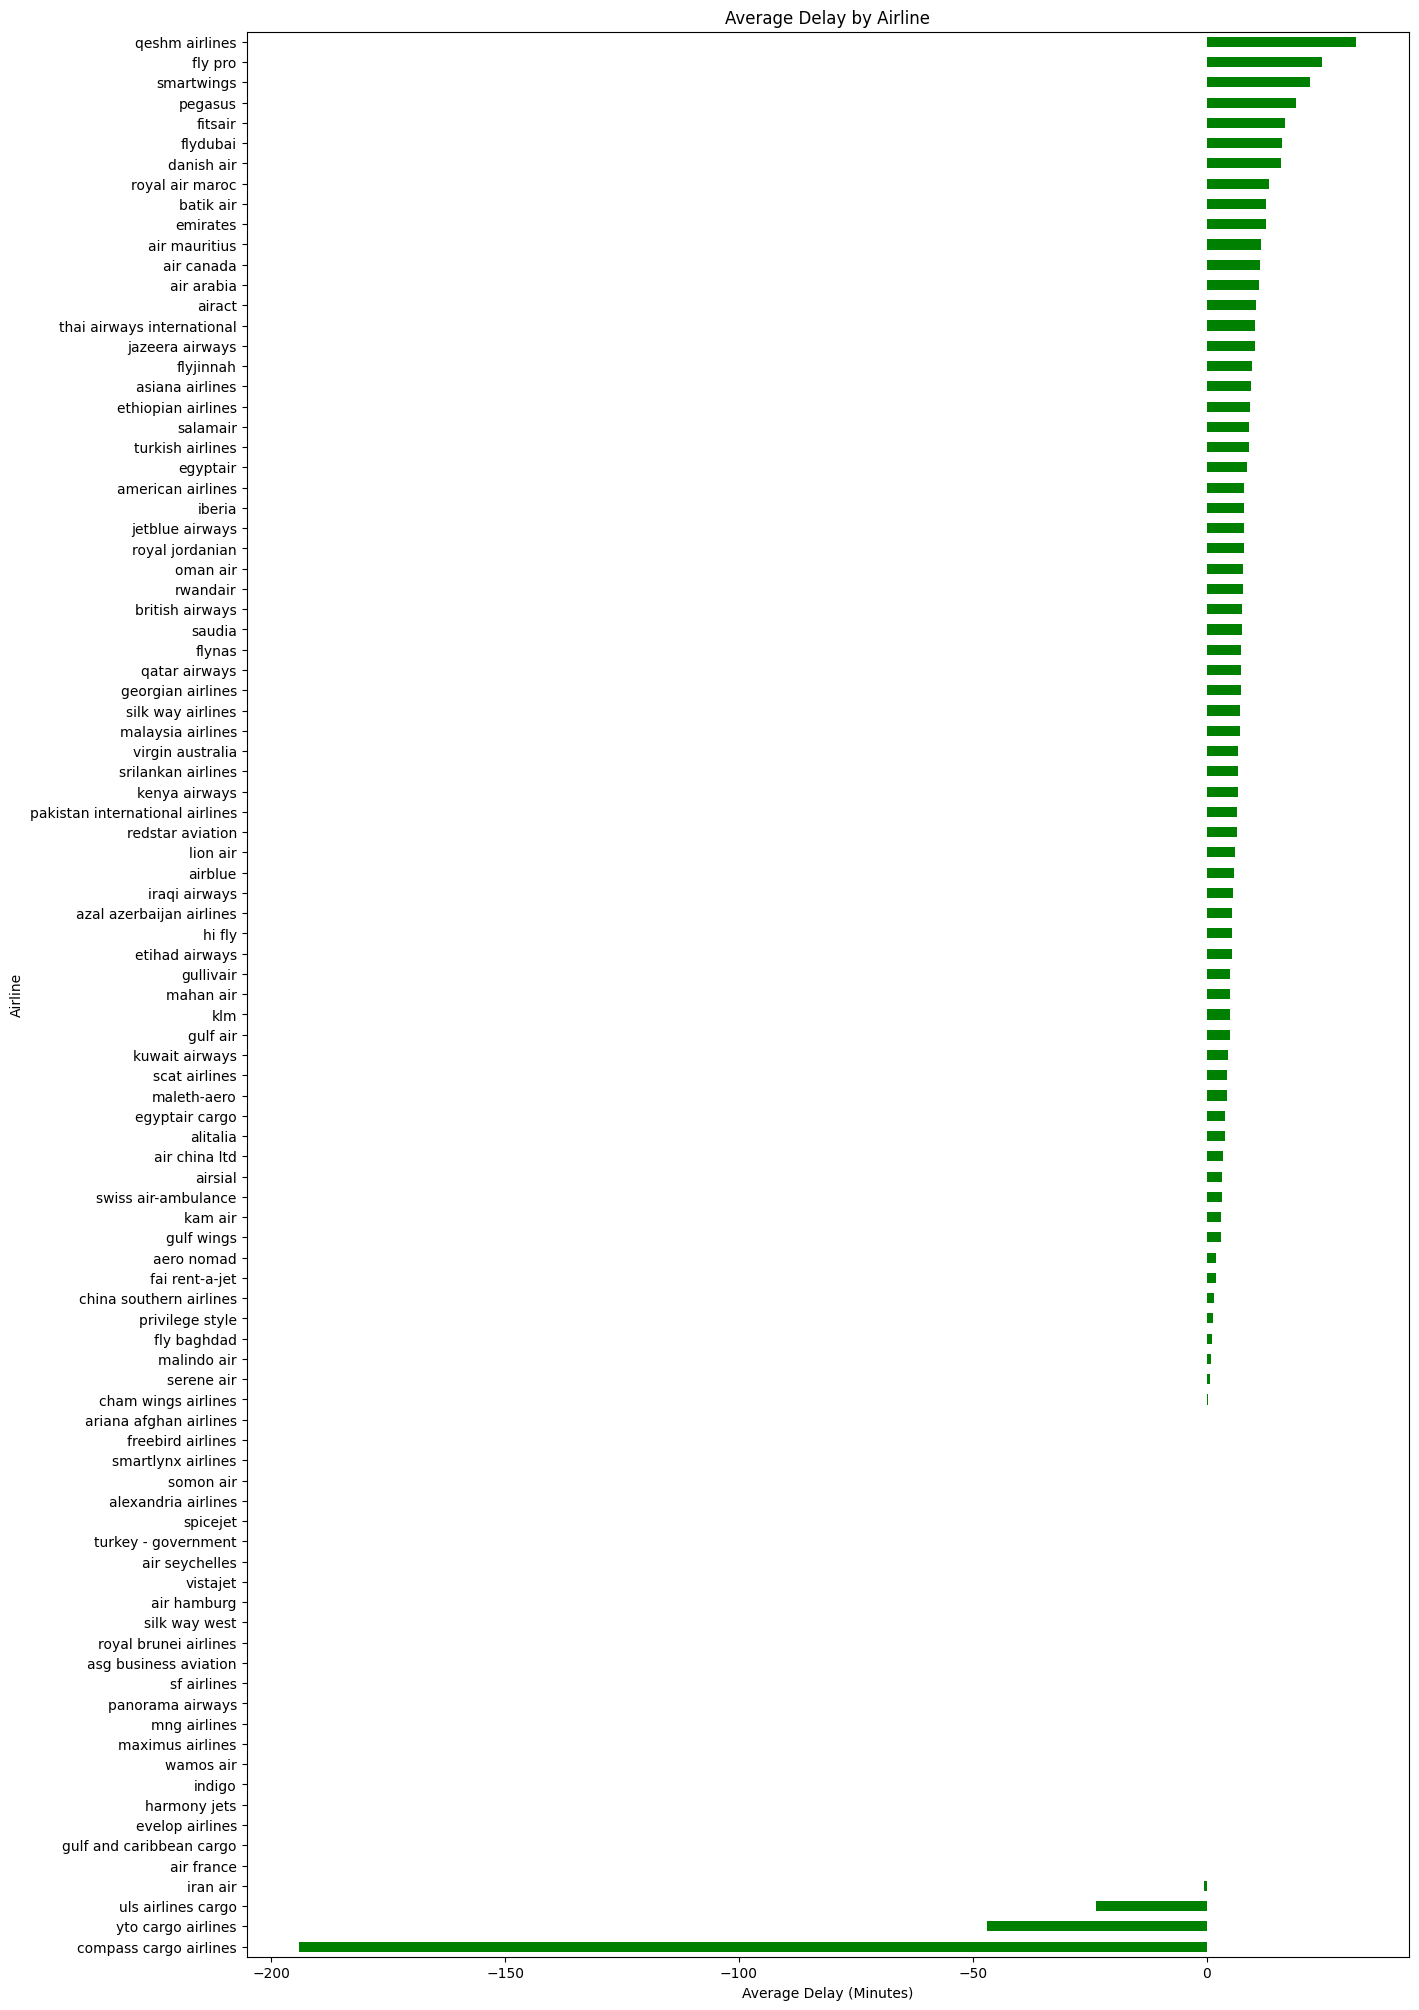

In [31]:
# Average delay by airline
airline_delay = df.groupby('airline_name')['departure_delay'].mean().sort_values()

plt.figure(figsize=(15, 25))
airline_delay.plot(kind='barh', color='green')
plt.title("Average Delay by Airline")
plt.xlabel("Average Delay (Minutes)")
plt.ylabel("Airline")
plt.show()


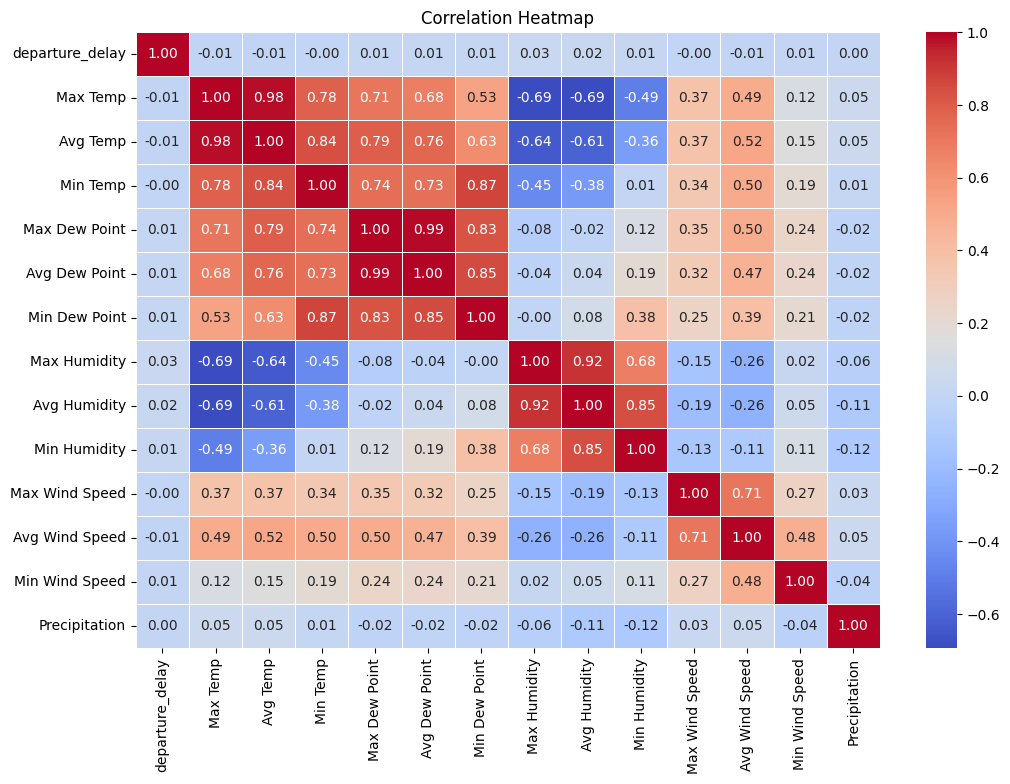

In [23]:
# Correlation heatmap for numerical features
corr_matrix = df_merged[['departure_delay', 'Max Temp', 'Avg Temp', 'Min Temp', 'Max Dew Point', 'Avg Dew Point',
                   'Min Dew Point', 'Max Humidity', 'Avg Humidity', 'Min Humidity', 'Max Wind Speed',
                   'Avg Wind Speed', 'Min Wind Speed', 'Precipitation']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


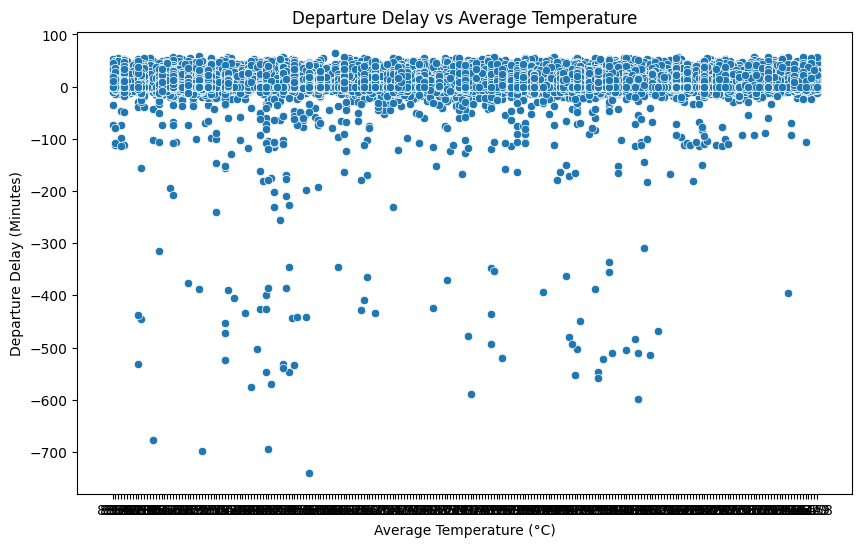

In [25]:
# Scatter plot for Departure Delay vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_merged['Avg Temp'], y=df['departure_delay'])
plt.title('Departure Delay vs Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Departure Delay (Minutes)')
plt.show()


C:\Users\huzai\AppData\Local\Temp\ipykernel_4212\569777211.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Month', y='departure_delay', data=df, palette='muted')


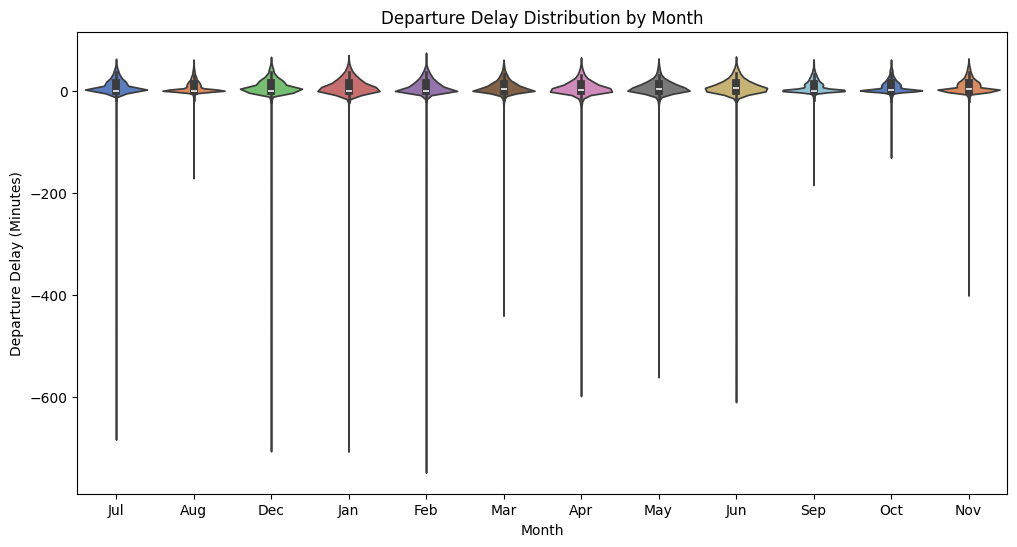

In [28]:
# Violin plot for delay distribution by Month
plt.figure(figsize=(12, 6))
sns.violinplot(x='Month', y='departure_delay', data=df, palette='muted')
plt.title('Departure Delay Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Departure Delay (Minutes)')
plt.show()


In [194]:
df=pd.read_csv('train.csv')

In [195]:
df

,type,status,departure_iata,departure_icao,departure_scheduled,departure_actual,arrival_iata,arrival_icao,airline_name,airline_iata,...,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Precipitation
0,departure,active,lhe,opla,2023-07-20 20:50:00,2023-07-20 20:15:00,ruh,oerk,saudia,sv,...,81,79.8,77,89,76.0,63,12,5.3,0,28.9
1,departure,active,lhe,opla,2023-07-18 15:05:00,2023-07-18 15:05:00,khi,opkc,flyjinnah,9p,...,81,80.1,77,84,73.8,63,17,10.2,0,28.8
2,departure,active,lhe,opla,2023-07-23 09:50:00,2023-07-23 09:50:00,khi,opkc,flyjinnah,9p,...,79,75.8,73,83,71.2,56,14,8.1,0,27.1
3,departure,active,lhe,opla,2023-07-26 23:30:00,2023-07-26 23:51:00,kwi,okkk,pakistan international airlines,pk,...,82,78.9,75,100,77.4,59,17,8.1,0,28.8
4,departure,active,lhe,opla,2023-07-20 11:35:00,2023-07-20 11:35:00,dxb,omdb,serene air,er,...,81,79.8,77,89,76.0,63,12,5.3,0,28.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,departure,active,lhe,opla,2023-11-16 09:50:00,2023-11-16 10:03:00,khi,opkc,flyjinnah,9p,...,57,54.8,52,82,65.5,42,7,0.8,0,29.3
51568,departure,active,lhe,opla,2023-11-16 11:40:00,2023-11-16 11:48:00,jed,oejn,saudia,sv,...,57,54.8,52,82,65.5,42,7,0.8,0,29.3
51569,departure,active,lhe,opla,2023-11-27 10:50:00,2023-11-27 10:50:00,dxb,omdb,pakistan international airlines,pk,...,55,54.3,52,88,74.4,60,12,2.3,0,29.2
51570,departure,active,lhe,opla,2023-11-19 02:00:00,2023-11-19 02:00:00,kul,wmkk,pakistan international airlines,pk,...,59,55.0,52,88,66.3,42,8,1.5,0,29.3


In [196]:
total_nan = df.isnull().sum()
print(f"Total NaN values in the DataFrame: {total_nan}")

Total NaN values in the DataFrame: type                    0
status                  0
departure_iata          0
departure_icao          0
departure_scheduled     0
departure_actual        0
arrival_iata            0
arrival_icao            0
airline_name            0
airline_iata           29
flight_number           0
codeshared_airline      0
codeshared_flight       0
departure_delay         0
Year                    0
Month                   0
Day                     0
Hour                    0
Max Temp                0
Avg Temp                0
Min Temp                0
Max Dew Point           0
Avg Dew Point           0
Min Dew Point           0
Max Humidity            0
Avg Humidity            0
Min Humidity            0
Max Wind Speed          0
Avg Wind Speed          0
Min Wind Speed          0
Precipitation           0
dtype: int64


In [197]:
df=df.drop(columns='airline_iata')
#since we got airline name already no need its prefix

In [198]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [199]:
df['departure_delay'] = df['departure_delay'].apply(lambda x: max(x, 0))
df['binary_delay'] = np.where(df['departure_delay'] > 0, 1, 0)
df['departure_scheduled'] = pd.to_datetime(df['departure_scheduled'])
df['departure_actual'] = pd.to_datetime(df['departure_actual'])

# Extract useful features from datetime columns
df['departure_scheduled_hour'] = df['departure_scheduled'].dt.hour
df['departure_scheduled_minute'] = df['departure_scheduled'].dt.minute
df['departure_actual_hour'] = df['departure_actual'].dt.hour
df['departure_actual_minute'] = df['departure_actual'].dt.minute

# Drop original datetime columns
df.drop(['departure_scheduled', 'departure_actual'], axis=1, inplace=True)

# Encode categorical variables using LabelEncoder
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])



In [200]:
df.columns

Index(['type', 'status', 'departure_iata', 'departure_icao', 'arrival_iata',
       'arrival_icao', 'airline_name', 'flight_number', 'codeshared_airline',
       'codeshared_flight', 'departure_delay', 'Year', 'Month', 'Day', 'Hour',
       'Max Temp', 'Avg Temp', 'Min Temp', 'Max Dew Point', 'Avg Dew Point',
       'Min Dew Point', 'Max Humidity', 'Avg Humidity', 'Min Humidity',
       'Max Wind Speed', 'Avg Wind Speed', 'Min Wind Speed', 'Precipitation',
       'binary_delay', 'departure_scheduled_hour',
       'departure_scheduled_minute', 'departure_actual_hour',
       'departure_actual_minute'],
      dtype='object')

In [201]:
df

,type,status,departure_iata,departure_icao,arrival_iata,arrival_icao,airline_name,flight_number,codeshared_airline,codeshared_flight,...,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Precipitation,binary_delay,departure_scheduled_hour,departure_scheduled_minute,departure_actual_hour,departure_actual_minute
0,0,0,2,2,66,31,75,737,0,65,...,63,12,5.3,0,28.9,0,20,50,20,15
1,0,0,2,2,45,50,35,843,0,65,...,63,17,10.2,0,28.8,0,15,5,15,5
2,0,0,2,2,45,50,35,841,0,65,...,56,14,8.1,0,27.1,0,9,50,9,50
3,0,0,2,2,48,35,63,205,0,65,...,59,17,8.1,0,28.8,1,23,30,23,51
4,0,0,2,2,23,38,77,723,0,65,...,63,12,5.3,0,28.9,0,11,35,11,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,0,0,2,2,45,50,35,841,0,65,...,42,7,0.8,0,29.3,1,9,50,10,3
51568,0,0,2,2,41,29,75,735,0,65,...,42,7,0.8,0,29.3,1,11,40,11,48
51569,0,0,2,2,23,38,63,203,0,65,...,60,12,2.3,0,29.2,0,10,50,10,50
51570,0,0,2,2,47,78,63,898,0,65,...,42,8,1.5,0,29.3,0,2,0,2,0


In [202]:
correlation_matrix = df.corr()
correlation_with_departure_delay = correlation_matrix['binary_delay'].sort_values(ascending=False)
print(correlation_with_departure_delay)


binary_delay                  1.000000
departure_delay               0.720061
codeshared_airline            0.117663
departure_actual_minute       0.115187
flight_number                 0.059003
Year                          0.031934
Max Temp                      0.029771
Month                         0.028380
departure_scheduled_minute    0.027351
Avg Temp                      0.025196
Avg Wind Speed                0.018694
Min Wind Speed                0.016188
Precipitation                 0.014999
Max Wind Speed                0.014934
Min Temp                      0.014194
departure_iata                0.010222
departure_icao                0.010222
arrival_icao                  0.008037
Max Dew Point                -0.003034
Avg Dew Point                -0.004705
Min Dew Point                -0.005049
Day                          -0.005558
Max Humidity                 -0.036747
Min Humidity                 -0.041708
Avg Humidity                 -0.046130
airline_name             

In [203]:

X = df.drop(columns=['binary_delay','departure_delay'])
y = df["binary_delay"]


In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [205]:

knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn.predict(X_test_scaled)


In [206]:
# a. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# b. Precision-Recall (overall)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' to account for class imbalance
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision (weighted): {precision:.2f}")
print(f"Recall (weighted): {recall:.2f}")

# c. F1-Score (overall)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score (weighted): {f1:.2f}")

# d. Class-wise Precision-Recall
class_wise_report = classification_report(y_test, y_pred)
print("\nClass-wise Precision-Recall and F1-Score:")
print(class_wise_report)

# e. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.77
Precision (weighted): 0.77
Recall (weighted): 0.77
F1-Score (weighted): 0.77

Class-wise Precision-Recall and F1-Score:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5080
           1       0.78      0.77      0.77      5235

    accuracy                           0.77     10315
   macro avg       0.77      0.77      0.77     10315
weighted avg       0.77      0.77      0.77     10315


Confusion Matrix:
[[3911 1169]
 [1185 4050]]


In [208]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

k_values = range(1, 21)  
mean_accuracies = []  

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation and store mean accuracy
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=skf, scoring='accuracy')
    mean_accuracies.append(np.mean(cv_scores))

# Find the best k
best_k = k_values[np.argmax(mean_accuracies)]
print(f"Best value of k: {best_k}")
print(f"Mean accuracies for each k: {mean_accuracies}")

# Train a final model using the best value of k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Evaluate on the test set
y_pred_best = knn_best.predict(X_test_scaled)

# Compute final metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print("\nFinal Evaluation with Best k:")
print(f"Accuracy: {accuracy_best:.2f}")
print(f"Precision (weighted): {precision_best:.2f}")
print(f"Recall (weighted): {recall_best:.2f}")
print(f"F1-Score (weighted): {f1_best:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_best)

# Class-wise metrics
class_wise_report_best = classification_report(y_test, y_pred_best)
print("\nClass-wise Precision-Recall and F1-Score:")
print(class_wise_report_best)


Best value of k: 1
Mean accuracies for each k: [0.765494342465165, 0.7391472341988482, 0.7601376245879331, 0.7482849946712491, 0.7564776354904146, 0.7495212319627763, 0.7545627953967066, 0.7487941384387199, 0.7492062008905866, 0.7465642760850446, 0.7461279917714994, 0.7444798007121802, 0.7453281357279626, 0.7435829103515589, 0.741183368657616, 0.7406743482612574, 0.7396078784322211, 0.7378142974546835, 0.7381294137116887, 0.7361418463473897]

Final Evaluation with Best k:
Accuracy: 0.78
Precision (weighted): 0.78
Recall (weighted): 0.78
F1-Score (weighted): 0.78

Confusion Matrix:
[[4005 1075]
 [1182 4053]]

Class-wise Precision-Recall and F1-Score:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      5080
           1       0.79      0.77      0.78      5235

    accuracy                           0.78     10315
   macro avg       0.78      0.78      0.78     10315
weighted avg       0.78      0.78      0.78     10315



In [55]:
df=df.drop(columns=["binary_delay"])

In [58]:
# Creating categorical labels for the delay
df['delay_category'] = pd.cut(df['departure_delay'], bins=[-np.inf, 0, 45, 175, np.inf], labels=[0, 1, 2, 3])


In [59]:
df.columns

Index(['type', 'status', 'departure_iata', 'departure_icao', 'arrival_iata',
       'arrival_icao', 'airline_name', 'flight_number', 'codeshared_airline',
       'codeshared_flight', 'departure_delay', 'Year', 'Month', 'Day', 'Hour',
       'Max Temp', 'Avg Temp', 'Min Temp', 'Max Dew Point', 'Avg Dew Point',
       'Min Dew Point', 'Max Humidity', 'Avg Humidity', 'Min Humidity',
       'Max Wind Speed', 'Avg Wind Speed', 'Min Wind Speed', 'Precipitation',
       'departure_scheduled_hour', 'departure_scheduled_minute',
       'departure_actual_hour', 'departure_actual_minute', 'delay_category'],
      dtype='object')

In [60]:
X = df.drop(columns=['delay_category','departure_delay'])
y = df['delay_category']


In [61]:
df['delay_category'].value_counts()

delay_category
1    26006
0    25183
2      383
3        0
Name: count, dtype: int64

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)



In [65]:
# a. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# b. Precision-Recall (overall)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' to account for class imbalance
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision (weighted): {precision:.2f}")
print(f"Recall (weighted): {recall:.2f}")

# c. F1-Score (overall)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score (weighted): {f1:.2f}")

# d. Class-wise Precision-Recall
class_wise_report = classification_report(y_test, y_pred)
print("\nClass-wise Precision-Recall and F1-Score:")
print(class_wise_report)

# e. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.95
Precision (weighted): 0.95
Recall (weighted): 0.95
F1-Score (weighted): 0.95

Class-wise Precision-Recall and F1-Score:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5080
           1       0.95      0.95      0.95      5160
           2       0.93      0.19      0.31        75

    accuracy                           0.95     10315
   macro avg       0.95      0.70      0.74     10315
weighted avg       0.95      0.95      0.95     10315


Confusion Matrix:
[[4878  202    0]
 [ 234 4925    1]
 [  24   37   14]]


In [66]:

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.2f}")


precision_scores = cross_val_score(model, X, y, cv=5, scoring='precision_weighted')
print(f"Mean Cross-Validation Precision: {precision_scores.mean():.2f}")

recall_scores = cross_val_score(model, X, y, cv=5, scoring='recall_weighted')
print(f"Mean Cross-Validation Recall: {recall_scores.mean():.2f}")

f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')
print(f"Mean Cross-Validation F1-Score: {f1_scores.mean():.2f}")


Cross-Validation Accuracy Scores: [0.72098885 0.77556956 0.64320341 0.49883653 0.64746946]
Mean Cross-Validation Accuracy: 0.66
Standard Deviation of Cross-Validation Accuracy: 0.09


C:\Users\huzai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\huzai\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Mean Cross-Validation Precision: 0.71
Mean Cross-Validation Recall: 0.66
Mean Cross-Validation F1-Score: 0.64


In [67]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],  # Number of trees
    'max_depth': [None, 10, 20],  # Maximum depth of trees
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2],    # Minimum samples required at a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           verbose=2, 
                           scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.2f}")

# Re-train with the best parameters
best_rf_model = grid_search.best_estimator_

# Evaluate the optimized model
y_pred_optimized = best_rf_model.predict(X_test)

# Evaluate performance
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Model Accuracy: {accuracy_optimized:.2f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.95
Optimized Model Accuracy: 0.96


In [68]:
X = df.drop(columns=['departure_delay', 'delay_category'])
y = df['departure_delay']


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the regression model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.8202762966553563
R-squared: 0.8823296292520313


In [70]:
from sklearn.metrics import mean_squared_error
import numpy as np

# RMSE for training set
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"Training RMSE: {train_rmse}")
print(f"Training MAE: {train_mae}")

# RMSE for validation set (test set)
validation_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
validation_mae = mean_absolute_error(y_test, y_pred)

print(f"Validation RMSE: {validation_rmse}")
print(f"Validation MAE: {validation_mae}")


Training RMSE: 1.3023344231438807
Training MAE: 0.2888988535278862
Validation RMSE: 3.7476831699099344
Validation MAE: 0.8202762966553563


In [71]:
from sklearn.model_selection import cross_val_score

# Cross-validation for MAE
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
mean_cv_mae = -cv_mae.mean()
print(f"Cross-Validation MAE: {mean_cv_mae:.2f}")

# Cross-validation for RMSE
cv_rmse = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
mean_cv_rmse = -cv_rmse.mean()
print(f"Cross-Validation RMSE: {mean_cv_rmse:.2f}")


Cross-Validation MAE: 1.67
Cross-Validation RMSE: 4.92


In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_absolute_error', 
                           n_jobs=-1, 
                           verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

optimized_model = grid_search.best_estimator_
optimized_y_pred = optimized_model.predict(X_test)

optimized_mae = mean_absolute_error(y_test, optimized_y_pred)
optimized_rmse = np.sqrt(mean_squared_error(y_test, optimized_y_pred))
optimized_r2 = r2_score(y_test, optimized_y_pred)

print(f"Optimized Model MAE: {optimized_mae}")
print(f"Optimized Model RMSE: {optimized_rmse}")
print(f"Optimized Model R-squared: {optimized_r2}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Model MAE: 0.8153698497333981
Optimized Model RMSE: 3.749889519135174
Optimized Model R-squared: 0.8821910378384417


In [73]:
TestFolder = 'Test'
TestFiles = [os.path.join(TestFolder,file) for file in os.listdir(TestFolder) if file.endswith('.docx')]
TestFiles

['Test\\1.docx',
 'Test\\10.docx',
 'Test\\11.docx',
 'Test\\12.docx',
 'Test\\13.docx',
 'Test\\14.docx',
 'Test\\15.docx',
 'Test\\16.docx',
 'Test\\17.docx',
 'Test\\18.docx',
 'Test\\19.docx',
 'Test\\2.docx',
 'Test\\20.docx',
 'Test\\21.docx',
 'Test\\22.docx',
 'Test\\23.docx',
 'Test\\24.docx',
 'Test\\25.docx',
 'Test\\26.docx',
 'Test\\27.docx',
 'Test\\28.docx',
 'Test\\29.docx',
 'Test\\3.docx',
 'Test\\30.docx',
 'Test\\31.docx',
 'Test\\32.docx',
 'Test\\33.docx',
 'Test\\34.docx',
 'Test\\35.docx',
 'Test\\36.docx',
 'Test\\37.docx',
 'Test\\39.docx',
 'Test\\4.docx',
 'Test\\40.docx',
 'Test\\41.docx',
 'Test\\42.docx',
 'Test\\43.docx',
 'Test\\44.docx',
 'Test\\45.docx',
 'Test\\46.docx',
 'Test\\47.docx',
 'Test\\48.docx',
 'Test\\49.docx',
 'Test\\5.docx',
 'Test\\50.docx',
 'Test\\51.docx',
 'Test\\52.docx',
 'Test\\53.docx',
 'Test\\54.docx',
 'Test\\55.docx',
 'Test\\56.docx',
 'Test\\57.docx',
 'Test\\58.docx',
 'Test\\59.docx',
 'Test\\6.docx',
 'Test\\60.docx'

In [75]:
all_flattened_data = []

for docx_file in TestFiles:
    print(f"Processing file: {docx_file}")
    try:
        file_content = extract_text_from_docx(docx_file)
        json_data = json.loads(file_content)
        flattened_data = flatten_json_data(json_data)
        all_flattened_data.extend(flattened_data)

    except Exception as e:
        print(f"Error processing file {docx_file}: {e}")

df = pd.DataFrame(all_flattened_data)

test_output_file = "processed_test_data.csv"
df.to_csv(test_output_file, index=False)
print(f"Data saved to {test_output_file}")
print(df.head())

Processing file: Test\1.docx
Processing file: Test\10.docx
Processing file: Test\11.docx
Processing file: Test\12.docx
Processing file: Test\13.docx
Processing file: Test\14.docx
Processing file: Test\15.docx
Processing file: Test\16.docx
Processing file: Test\17.docx
Processing file: Test\18.docx
Processing file: Test\19.docx
Processing file: Test\2.docx
Processing file: Test\20.docx
Processing file: Test\21.docx
Processing file: Test\22.docx
Processing file: Test\23.docx
Processing file: Test\24.docx
Processing file: Test\25.docx
Processing file: Test\26.docx
Processing file: Test\27.docx
Processing file: Test\28.docx
Processing file: Test\29.docx
Processing file: Test\3.docx
Processing file: Test\30.docx
Processing file: Test\31.docx
Processing file: Test\32.docx
Processing file: Test\33.docx
Processing file: Test\34.docx
Processing file: Test\35.docx
Processing file: Test\36.docx
Processing file: Test\37.docx
Processing file: Test\39.docx
Processing file: Test\4.docx
Processing fil

In [76]:
df=pd.read_csv('processed_test_data.csv')

In [77]:
df

,type,status,departure_iata,departure_icao,departure_scheduled,departure_actual,arrival_iata,arrival_icao,airline_name,airline_iata,flight_number,codeshared_airline,codeshared_flight
0,departure,active,lhe,opla,2023-07-17t20:35:00.000,NaN,khi,opkc,flyjinnah,9p,847,NaN,NaN
1,departure,active,lhe,opla,2023-07-27t08:00:00.000,NaN,ruh,oerk,pakistan international airlines,pk,725,NaN,NaN
2,departure,active,lhe,opla,2023-07-27t08:00:00.000,NaN,dxb,omdb,ethiopian airlines,et,4359,pakistan international airlines,203.0
3,departure,unknown,lhe,opla,2023-07-28t16:45:00.000,NaN,jed,oejn,airblue,pa,470,NaN,NaN
4,departure,active,lhe,opla,2023-07-19t04:15:00.000,NaN,auh,omaa,klm,kl,3932,etihad airways,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14905,departure,active,lhe,opla,2023-11-23t23:15:00.000,NaN,shj,omsj,airblue,pa,412,NaN,NaN
14906,departure,active,lhe,opla,2023-11-25t18:45:00.000,NaN,jed,oejn,pakistan international airlines,pk,859,NaN,NaN
14907,departure,active,lhe,opla,2023-11-25t02:55:00.000,NaN,doh,othh,british airways,ba,6187,qatar airways,621.0
14908,departure,active,lhe,opla,2023-11-27t08:35:00.000,NaN,doh,othh,oman air,wy,6032,qatar airways,629.0


In [78]:
df=df.drop(columns='departure_actual')
df=df.drop(columns='airline_iata')

In [79]:
df

,type,status,departure_iata,departure_icao,departure_scheduled,arrival_iata,arrival_icao,airline_name,flight_number,codeshared_airline,codeshared_flight
0,departure,active,lhe,opla,2023-07-17t20:35:00.000,khi,opkc,flyjinnah,847,NaN,NaN
1,departure,active,lhe,opla,2023-07-27t08:00:00.000,ruh,oerk,pakistan international airlines,725,NaN,NaN
2,departure,active,lhe,opla,2023-07-27t08:00:00.000,dxb,omdb,ethiopian airlines,4359,pakistan international airlines,203.0
3,departure,unknown,lhe,opla,2023-07-28t16:45:00.000,jed,oejn,airblue,470,NaN,NaN
4,departure,active,lhe,opla,2023-07-19t04:15:00.000,auh,omaa,klm,3932,etihad airways,242.0
...,...,...,...,...,...,...,...,...,...,...,...
14905,departure,active,lhe,opla,2023-11-23t23:15:00.000,shj,omsj,airblue,412,NaN,NaN
14906,departure,active,lhe,opla,2023-11-25t18:45:00.000,jed,oejn,pakistan international airlines,859,NaN,NaN
14907,departure,active,lhe,opla,2023-11-25t02:55:00.000,doh,othh,british airways,6187,qatar airways,621.0
14908,departure,active,lhe,opla,2023-11-27t08:35:00.000,doh,othh,oman air,6032,qatar airways,629.0


In [80]:
df['codeshared_airline'] = df['codeshared_airline'].fillna("No Code Share")
df['codeshared_flight'] = df['codeshared_flight'].fillna("No Code Share")

total_nan = df.isnull().sum()
print(f"Total NaN values in the DataFrame: {total_nan}")


Total NaN values in the DataFrame: type                   0
status                 0
departure_iata         0
departure_icao         0
departure_scheduled    0
arrival_iata           0
arrival_icao           0
airline_name           0
flight_number          0
codeshared_airline     0
codeshared_flight      0
dtype: int64


In [81]:
weather_df = pd.read_csv("weather.csv")

In [82]:
weather_df['Year'].unique()

array([2023, 2024], dtype=int64)

In [83]:
weather_df['Month'].unique()

array(['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun'], dtype=object)

In [84]:
df

,type,status,departure_iata,departure_icao,departure_scheduled,arrival_iata,arrival_icao,airline_name,flight_number,codeshared_airline,codeshared_flight
0,departure,active,lhe,opla,2023-07-17t20:35:00.000,khi,opkc,flyjinnah,847,No Code Share,No Code Share
1,departure,active,lhe,opla,2023-07-27t08:00:00.000,ruh,oerk,pakistan international airlines,725,No Code Share,No Code Share
2,departure,active,lhe,opla,2023-07-27t08:00:00.000,dxb,omdb,ethiopian airlines,4359,pakistan international airlines,203.0
3,departure,unknown,lhe,opla,2023-07-28t16:45:00.000,jed,oejn,airblue,470,No Code Share,No Code Share
4,departure,active,lhe,opla,2023-07-19t04:15:00.000,auh,omaa,klm,3932,etihad airways,242.0
...,...,...,...,...,...,...,...,...,...,...,...
14905,departure,active,lhe,opla,2023-11-23t23:15:00.000,shj,omsj,airblue,412,No Code Share,No Code Share
14906,departure,active,lhe,opla,2023-11-25t18:45:00.000,jed,oejn,pakistan international airlines,859,No Code Share,No Code Share
14907,departure,active,lhe,opla,2023-11-25t02:55:00.000,doh,othh,british airways,6187,qatar airways,621.0
14908,departure,active,lhe,opla,2023-11-27t08:35:00.000,doh,othh,oman air,6032,qatar airways,629.0


In [85]:
# Convert 'departure_scheduled' to datetime
df['departure_scheduled'] = pd.to_datetime(df['departure_scheduled'])

# Extract Year, Month, Day, and Hour from 'departure_scheduled'
df['Year'] = df['departure_scheduled'].dt.year
df['Month'] = df['departure_scheduled'].dt.strftime('%b')  # Short month name (e.g., 'Jan')
df['Day'] = df['departure_scheduled'].dt.day.astype(str)
df['Hour'] = df['departure_scheduled'].dt.hour

df


,type,status,departure_iata,departure_icao,departure_scheduled,arrival_iata,arrival_icao,airline_name,flight_number,codeshared_airline,codeshared_flight,Year,Month,Day,Hour
0,departure,active,lhe,opla,2023-07-17 20:35:00,khi,opkc,flyjinnah,847,No Code Share,No Code Share,2023,Jul,17,20
1,departure,active,lhe,opla,2023-07-27 08:00:00,ruh,oerk,pakistan international airlines,725,No Code Share,No Code Share,2023,Jul,27,8
2,departure,active,lhe,opla,2023-07-27 08:00:00,dxb,omdb,ethiopian airlines,4359,pakistan international airlines,203.0,2023,Jul,27,8
3,departure,unknown,lhe,opla,2023-07-28 16:45:00,jed,oejn,airblue,470,No Code Share,No Code Share,2023,Jul,28,16
4,departure,active,lhe,opla,2023-07-19 04:15:00,auh,omaa,klm,3932,etihad airways,242.0,2023,Jul,19,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14905,departure,active,lhe,opla,2023-11-23 23:15:00,shj,omsj,airblue,412,No Code Share,No Code Share,2023,Nov,23,23
14906,departure,active,lhe,opla,2023-11-25 18:45:00,jed,oejn,pakistan international airlines,859,No Code Share,No Code Share,2023,Nov,25,18
14907,departure,active,lhe,opla,2023-11-25 02:55:00,doh,othh,british airways,6187,qatar airways,621.0,2023,Nov,25,2
14908,departure,active,lhe,opla,2023-11-27 08:35:00,doh,othh,oman air,6032,qatar airways,629.0,2023,Nov,27,8


In [86]:
print(df['Month'].unique())
print(weather_df['Month'].unique())

['Jul' 'Dec' 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Aug' 'Jun' 'Sep' 'Oct' 'Nov']
['Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun']


In [87]:
df_merged = pd.merge(df, df_weather, on=['Year','Month', 'Day'], how='left')

df_merged


,type,status,departure_iata,departure_icao,departure_scheduled,arrival_iata,arrival_icao,airline_name,flight_number,codeshared_airline,...,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Precipitation
0,departure,active,lhe,opla,2023-07-17 20:35:00,khi,opkc,flyjinnah,847,No Code Share,...,81,78.1,75,89,71.3,59,12,6.9,0,28.8
1,departure,active,lhe,opla,2023-07-27 08:00:00,ruh,oerk,pakistan international airlines,725,No Code Share,...,79,77.1,73,100,83.7,70,16,7.5,0,28.8
2,departure,active,lhe,opla,2023-07-27 08:00:00,dxb,omdb,ethiopian airlines,4359,pakistan international airlines,...,79,77.1,73,100,83.7,70,16,7.5,0,28.8
3,departure,unknown,lhe,opla,2023-07-28 16:45:00,jed,oejn,airblue,470,No Code Share,...,79,76.7,75,89,73.8,59,13,7.4,0,28.9
4,departure,active,lhe,opla,2023-07-19 04:15:00,auh,omaa,klm,3932,etihad airways,...,81,79.8,77,100,85.3,75,23,11.3,0,28.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14905,departure,active,lhe,opla,2023-11-23 23:15:00,shj,omsj,airblue,412,No Code Share,...,57,52.9,0,88,69.3,0,6,0.7,0,28.6
14906,departure,active,lhe,opla,2023-11-25 18:45:00,jed,oejn,pakistan international airlines,859,No Code Share,...,54,52.2,48,88,69.2,44,8,1.0,0,29.2
14907,departure,active,lhe,opla,2023-11-25 02:55:00,doh,othh,british airways,6187,qatar airways,...,54,52.2,48,88,69.2,44,8,1.0,0,29.2
14908,departure,active,lhe,opla,2023-11-27 08:35:00,doh,othh,oman air,6032,qatar airways,...,55,54.3,52,88,74.4,60,12,2.3,0,29.2


In [88]:
total_nan = df_merged.isnull().sum()
print(f"Total NaN values in the DataFrame: {total_nan}")

Total NaN values in the DataFrame: type                   0
status                 0
departure_iata         0
departure_icao         0
departure_scheduled    0
arrival_iata           0
arrival_icao           0
airline_name           0
flight_number          0
codeshared_airline     0
codeshared_flight      0
Year                   0
Month                  0
Day                    0
Hour                   0
Max Temp               0
Avg Temp               0
Min Temp               0
Max Dew Point          0
Avg Dew Point          0
Min Dew Point          0
Max Humidity           0
Avg Humidity           0
Min Humidity           0
Max Wind Speed         0
Avg Wind Speed         0
Min Wind Speed         0
Precipitation          0
dtype: int64


In [89]:
drop = 14910 - 12914
df_merged = df_merged.iloc[:-drop]
df_merged

,type,status,departure_iata,departure_icao,departure_scheduled,arrival_iata,arrival_icao,airline_name,flight_number,codeshared_airline,...,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Precipitation
0,departure,active,lhe,opla,2023-07-17 20:35:00,khi,opkc,flyjinnah,847,No Code Share,...,81,78.1,75,89,71.3,59,12,6.9,0,28.8
1,departure,active,lhe,opla,2023-07-27 08:00:00,ruh,oerk,pakistan international airlines,725,No Code Share,...,79,77.1,73,100,83.7,70,16,7.5,0,28.8
2,departure,active,lhe,opla,2023-07-27 08:00:00,dxb,omdb,ethiopian airlines,4359,pakistan international airlines,...,79,77.1,73,100,83.7,70,16,7.5,0,28.8
3,departure,unknown,lhe,opla,2023-07-28 16:45:00,jed,oejn,airblue,470,No Code Share,...,79,76.7,75,89,73.8,59,13,7.4,0,28.9
4,departure,active,lhe,opla,2023-07-19 04:15:00,auh,omaa,klm,3932,etihad airways,...,81,79.8,77,100,85.3,75,23,11.3,0,28.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909,departure,active,isb,opis,2024-04-07 03:35:00,doh,othh,oman air,6034,qatar airways,...,55,50.8,43,64,37.4,17,15,4.9,0,29.1
12910,departure,active,isb,opis,2024-04-12 16:30:00,kbl,oakb,kam air,928,No Code Share,...,57,53.9,50,68,41.9,23,12,7.1,0,29.0
12911,departure,active,isb,opis,2024-04-09 10:55:00,jed,oejn,saudia,723,No Code Share,...,57,50.4,45,56,34.9,17,12,3.3,0,29.0
12912,departure,active,isb,opis,2024-04-05 12:00:00,khi,opkc,serene air,501,No Code Share,...,55,49.1,43,64,36.8,18,16,9.3,0,29.0


In [90]:
df_merged.to_csv("test.csv", index=False)

In [102]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [103]:
train.columns

Index(['type', 'status', 'departure_iata', 'departure_icao',
       'departure_scheduled', 'departure_actual', 'arrival_iata',
       'arrival_icao', 'airline_name', 'airline_iata', 'flight_number',
       'codeshared_airline', 'codeshared_flight', 'departure_delay', 'Year',
       'Month', 'Day', 'Hour', 'Max Temp', 'Avg Temp', 'Min Temp',
       'Max Dew Point', 'Avg Dew Point', 'Min Dew Point', 'Max Humidity',
       'Avg Humidity', 'Min Humidity', 'Max Wind Speed', 'Avg Wind Speed',
       'Min Wind Speed', 'Precipitation'],
      dtype='object')

In [104]:
test.columns

Index(['type', 'status', 'departure_iata', 'departure_icao',
       'departure_scheduled', 'arrival_iata', 'arrival_icao', 'airline_name',
       'flight_number', 'codeshared_airline', 'codeshared_flight', 'Year',
       'Month', 'Day', 'Hour', 'Max Temp', 'Avg Temp', 'Min Temp',
       'Max Dew Point', 'Avg Dew Point', 'Min Dew Point', 'Max Humidity',
       'Avg Humidity', 'Min Humidity', 'Max Wind Speed', 'Avg Wind Speed',
       'Min Wind Speed', 'Precipitation'],
      dtype='object')

In [106]:
train=train.drop(columns='departure_actual')

In [107]:
categorical_cols = train.select_dtypes(include=["object"]).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    train[col] = label_encoders[col].fit_transform(train[col])

In [108]:
train

,type,status,departure_iata,departure_icao,departure_scheduled,arrival_iata,arrival_icao,airline_name,airline_iata,flight_number,...,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Precipitation
0,0,0,2,2,710,66,31,75,72,737,...,81,79.8,77,89,76.0,63,12,5.3,0,28.9
1,0,0,2,2,504,45,50,35,8,843,...,81,80.1,77,84,73.8,63,17,10.2,0,28.8
2,0,0,2,2,935,45,50,35,8,841,...,79,75.8,73,83,71.2,56,14,8.1,0,27.1
3,0,0,2,2,1263,48,35,63,65,205,...,82,78.9,75,100,77.4,59,17,8.1,0,28.8
4,0,0,2,2,675,23,38,77,27,723,...,81,79.8,77,89,76.0,63,12,5.3,0,28.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51567,0,0,2,2,10869,45,50,35,8,841,...,57,54.8,52,82,65.5,42,7,0.8,0,29.3
51568,0,0,2,2,10879,41,29,75,72,735,...,57,54.8,52,82,65.5,42,7,0.8,0,29.3
51569,0,0,2,2,11787,23,38,63,65,203,...,55,54.3,52,88,74.4,60,12,2.3,0,29.2
51570,0,0,2,2,11088,47,78,63,65,898,...,59,55.0,52,88,66.3,42,8,1.5,0,29.3


In [109]:
categorical_cols = test.select_dtypes(include=["object"]).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    test[col] = label_encoders[col].fit_transform(test[col])

In [110]:
test

,type,status,departure_iata,departure_icao,departure_scheduled,arrival_iata,arrival_icao,airline_name,flight_number,codeshared_airline,...,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Precipitation
0,0,0,2,2,120,32,37,28,847,0,...,81,78.1,75,89,71.3,59,12,6.9,0,28.8
1,0,0,2,2,397,53,19,49,725,0,...,79,77.1,73,100,83.7,70,16,7.5,0,28.8
2,0,0,2,2,397,17,26,22,4359,11,...,79,77.1,73,100,83.7,70,16,7.5,0,28.8
3,0,2,2,2,439,28,17,7,470,0,...,79,76.7,75,89,73.8,59,13,7.4,0,28.9
4,0,0,2,2,163,4,24,40,3932,5,...,81,79.8,77,100,85.3,75,23,11.3,0,28.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12909,0,0,0,0,8155,16,52,48,6034,12,...,55,50.8,43,64,37.4,17,15,4.9,0,29.1
12910,0,0,0,0,8325,29,11,38,928,0,...,57,53.9,50,68,41.9,23,12,7.1,0,29.0
12911,0,0,0,0,8221,28,17,58,723,0,...,57,50.4,45,56,34.9,17,12,3.3,0,29.0
12912,0,0,0,0,8106,32,37,60,501,0,...,55,49.1,43,64,36.8,18,16,9.3,0,29.0


In [111]:
train['binary_delay'] = (train['departure_delay'] > 0).astype(int)

In [180]:
knn_best.fit(train[['Hour']],train['binary_delay'])

KNeighborsClassifier(n_neighbors=1)

In [181]:
y=knn_best.predict(test[['Hour']])

In [182]:
test['Delay'] = y
test['Delay'] = test['Delay'].map({0: 'on-time', 1: 'delayed'})

submission = test[['Delay']] 
submission.index = submission.index + 1 

submission.index.name = 'ID'
submission.to_csv('Binary_Submission.csv', index=True)

In [183]:
sum(y==0)

8440

In [184]:
sum(y==1)

4474

In [185]:
knn = KNeighborsClassifier(n_neighbors=14)

In [186]:
knn.fit(train[['Hour']],train['binary_delay'])

KNeighborsClassifier(n_neighbors=14)

In [187]:
y=knn.predict(test[['Hour']])

In [188]:
test['Delay'] = y
test['Delay'] = test['Delay'].map({0: 'on-time', 1: 'delayed'}) 

submission = test[['Delay']]  
submission.index = submission.index + 1  

submission.index.name = 'ID'
submission.to_csv('Binary_Submission.csv', index=True)  

In [189]:
sum(y==0)

11460

In [190]:
sum(y==1)

1454

In [191]:
train['departure_delay']

0       -35.0
1         0.0
2         0.0
3        21.0
4         0.0
         ... 
51567    13.0
51568     8.0
51569     0.0
51570     0.0
51571    17.0
Name: departure_delay, Length: 51572, dtype: float64

In [192]:
def categorize_delay(delay):
    if delay <= 0:
        return 'No Delay'
    elif 1 <= delay <= 15:
        return 'Short Delay'
    elif 16 <= delay <= 60:
        return 'Moderate Delay'
    else:
        return 'Long Delay'

train['delay_category'] = train['departure_delay'].apply(categorize_delay)

train['delay_category']


0              No Delay
1              No Delay
2              No Delay
3        Moderate Delay
4              No Delay
              ...      
51567       Short Delay
51568       Short Delay
51569          No Delay
51570          No Delay
51571    Moderate Delay
Name: delay_category, Length: 51572, dtype: object

In [193]:
X_train_multi = train[['Hour']]
y_train_multi = train['delay_category']

X_test_multi = test[['Hour']]


best_rf_model.fit(X_train_multi, y_train_multi)
multi_predictions = best_rf_model.predict(X_test_multi)

submission_multi = pd.DataFrame({
    'ID': range(1, len(multi_predictions) + 1),
    'Delay': multi_predictions
})

submission_multi.to_csv('submission_multi.csv', index=False)
print("Multi-class classification submission file saved as 'submission_multi.csv'.")

Multi-class classification submission file saved as 'submission_multi.csv'.


In [216]:
train['departure_delay'] = train['departure_delay'].apply(lambda x: max(x, 0))
X_train_reg = train[['Hour']]
y_train_reg = train['departure_delay']

X_test_reg = test[['Hour']]

optimized_model.fit(X_train_reg, y_train_reg)
regression_predictions = optimized_model.predict(X_test_reg)
submission_reg = pd.DataFrame({
    'ID': range(1, len(regression_predictions) + 1),
    'Delay': regression_predictions
})

submission_reg.to_csv('submission_regression_rf.csv', index=False)
print("Regression submission file saved as 'submission_regression_rf.csv'.")

Regression submission file saved as 'submission_regression_rf.csv'.
